In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

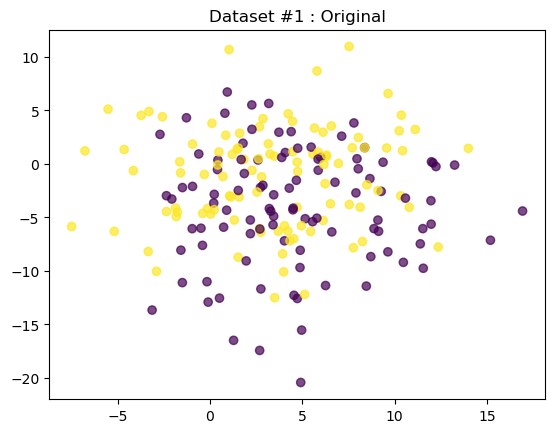

In [9]:
X1, label1 = make_blobs(n_samples=200, n_features=7, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

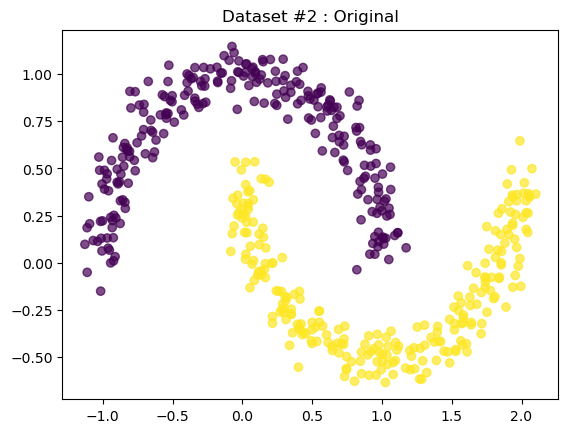

In [7]:
X2, label2 = make_moons(n_samples=500, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

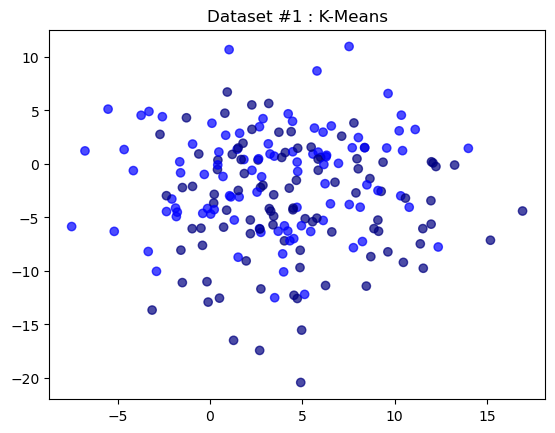

In [13]:
kmeans = KMeans(n_clusters=2,random_state=123)                
kmeans.fit(X1)                                                    
myColors = {0:'blue',1:'navy'}                                 
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )    
plt.title('Dataset #1 : K-Means')
plt.show()

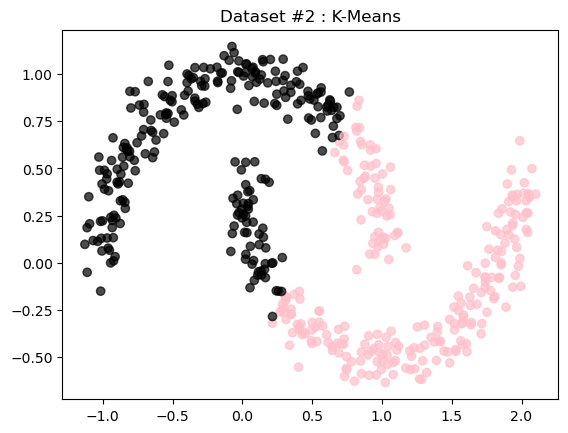

In [15]:
kmeans = KMeans(n_clusters=2,random_state=100)               
kmeans.fit(X2)                                                  
myColors = {0:'black',1:'pink'}                                 
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()

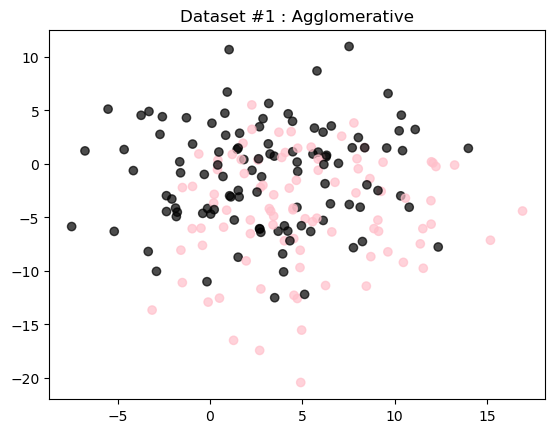

In [19]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'black',1:'pink'}                                 
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

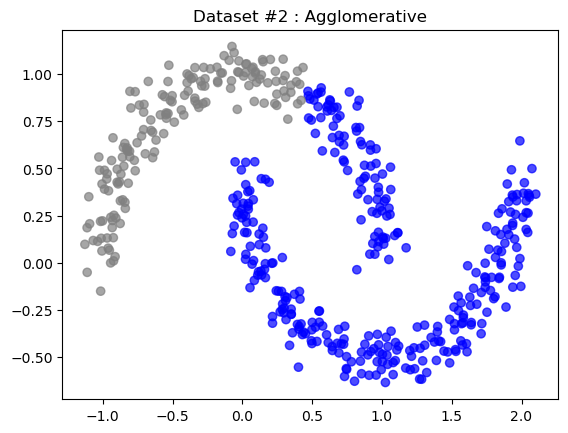

In [21]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'blue',1:'grey'}                                 
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

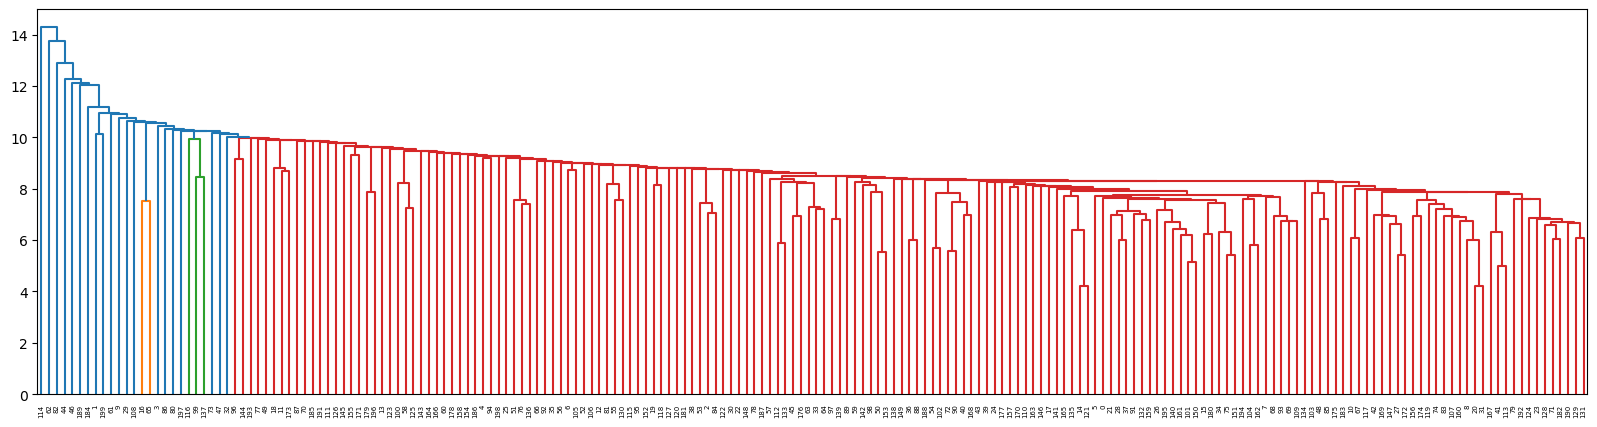

In [23]:
myLinkage = linkage(X1,method='single')     
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [25]:
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()

60     2
110    2
117    2
80     1
28     1
      ..
119    1
54     1
182    1
115    1
2      1
Name: count, Length: 197, dtype: int64

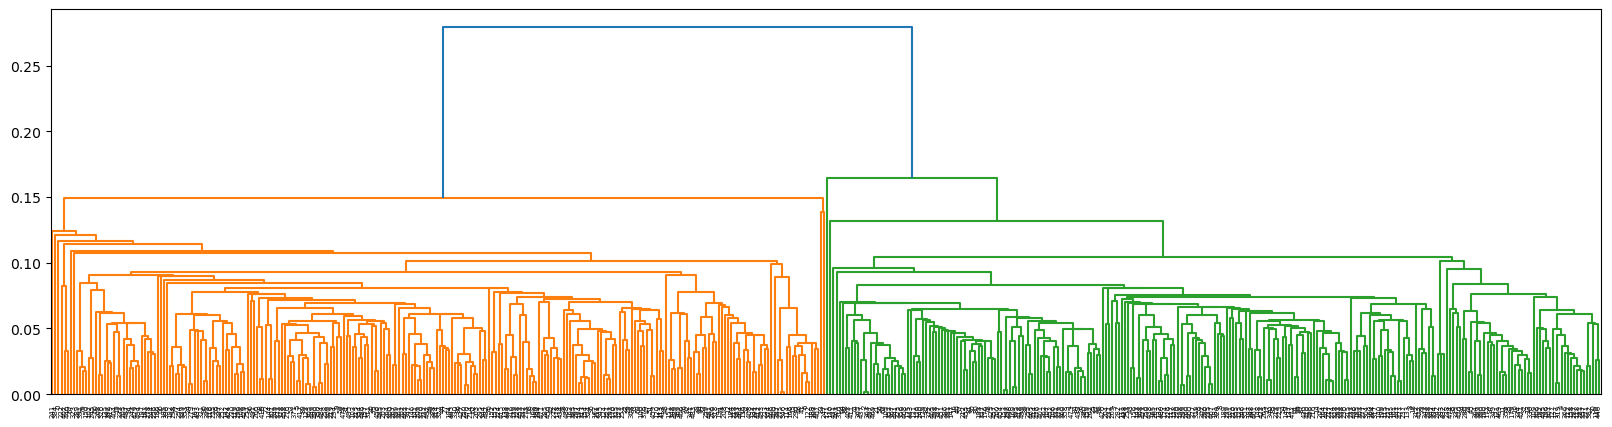

In [27]:
myLinkage = linkage(X2,method='single')   
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [29]:
labels = fcluster(myLinkage, 0.23, criterion='distance')                     
pd.Series(labels).value_counts()

1    250
2    250
Name: count, dtype: int64

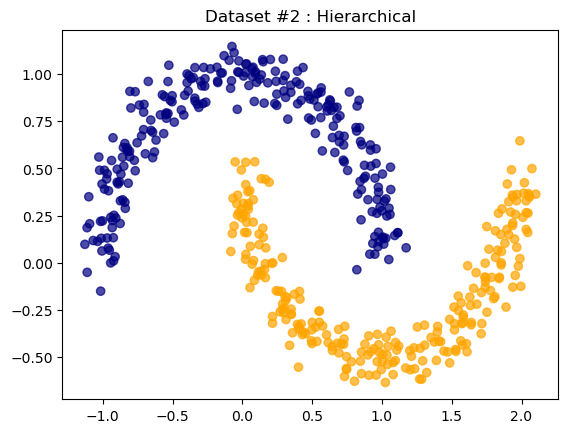

In [33]:
myColors = {1:'navy',2:'orange'}                                                
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

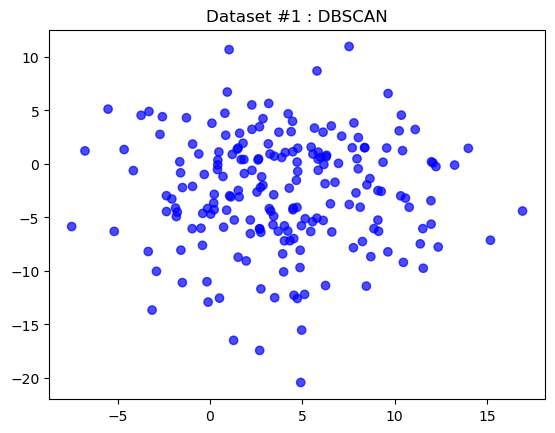

In [37]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'blue',0:'navy',1:'pink'}                                
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1. Red = -1 = outlier.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()